# Pre Data Cleaning

# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train_openpose.csv')
df.head()

,Unnamed: 0,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,0,56.221785,-56.221785,119.981639,65.224859,63.434949,-34.954670,27.457923,-33.157468,14.036243,goddess
1,1,151.557071,-71.760599,80.551799,58.762975,72.534825,-42.226689,101.888658,-35.793341,15.154068,goddess
2,2,45.000000,66.889557,86.744133,74.248826,54.741300,84.375656,-50.131165,-21.221589,-9.667596,goddess
3,3,134.838604,32.916718,83.896048,-89.613442,123.490779,56.706437,46.518720,-40.801327,0.000000,goddess
4,4,79.837615,-71.221967,-66.804016,76.452061,111.801409,68.198591,47.641267,-46.913279,0.000000,goddess


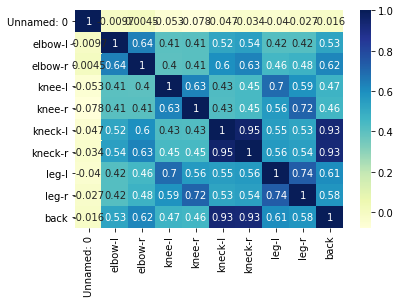

In [3]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

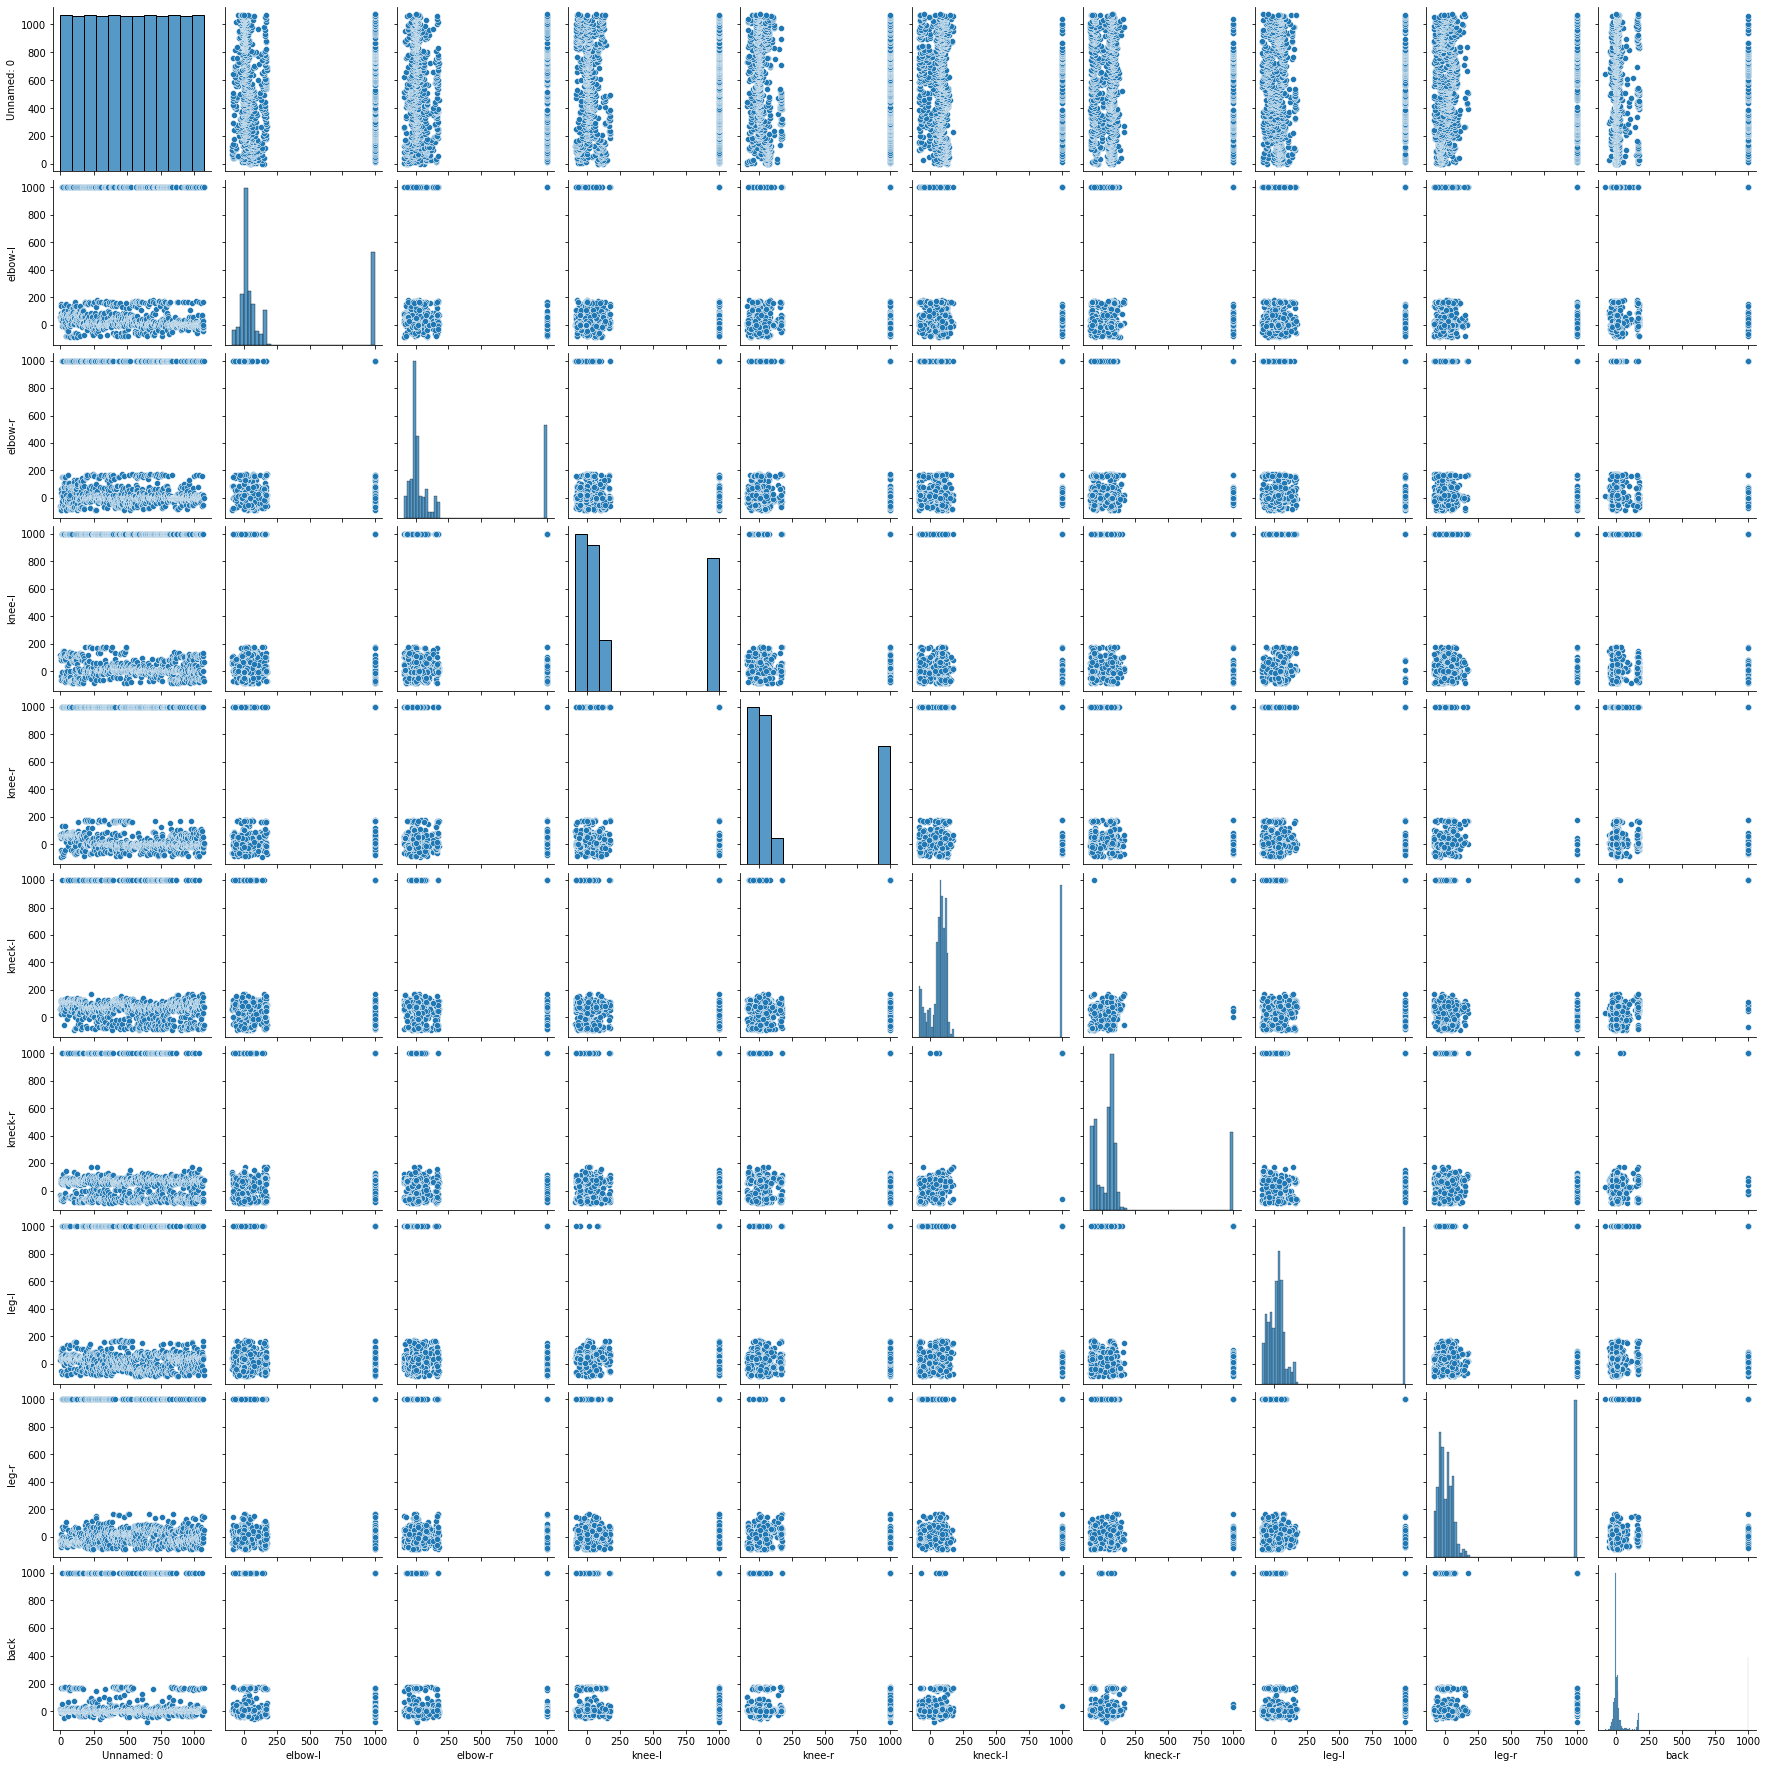

In [4]:
sns.pairplot(df)

In [5]:
### Add a few EDA Screenshots

### Implement various classifiers:
# KNN -- done
# SVM -- done
# Decision Trees -- done
# Random Forest -- done
# ANN -- to be done

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

train = pd.read_csv('train_openpose.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)
train = train.sample(frac=1).reset_index(drop=True)
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

test = pd.read_csv('test_openpose.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)
test = test.sample(frac=1).reset_index(drop=True)
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.6072961373390557
[[55  2  5  4 14]
 [ 4 41  5 27 14]
 [ 2  8 54  5  0]
 [ 3 41  9 51 13]
 [ 1 12  2 12 82]]
              precision    recall  f1-score   support

     goddess       0.85      0.69      0.76        80
    halfMoon       0.39      0.45      0.42        91
        tree       0.72      0.78      0.75        69
    triangle       0.52      0.44      0.47       117
    warrior2       0.67      0.75      0.71       109

    accuracy                           0.61       466
   macro avg       0.63      0.62      0.62       466
weighted avg       0.61      0.61      0.61       466



# SVM

In [7]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(train_x, train_y)
y_pred = svclassifier.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.351931330472103
[[ 0  2  2  9 67]
 [ 1 11  4 45 30]
 [ 3  7  6 12 41]
 [ 2 11  8 64 32]
 [ 0  9  4 13 83]]
              precision    recall  f1-score   support

     goddess       0.00      0.00      0.00        80
    halfMoon       0.28      0.12      0.17        91
        tree       0.25      0.09      0.13        69
    triangle       0.45      0.55      0.49       117
    warrior2       0.33      0.76      0.46       109

    accuracy                           0.35       466
   macro avg       0.26      0.30      0.25       466
weighted avg       0.28      0.35      0.28       466



# Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=15, min_samples_leaf=5)   
clf_model.fit(train_x,train_y)
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
y_pred = clf_model.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.5450643776824035
[[52  6 10  2 10]
 [11 35  8 23 14]
 [ 7  2 49  0 11]
 [ 8 30 11 52 16]
 [ 4 14 11 14 66]]
              precision    recall  f1-score   support

     goddess       0.63      0.65      0.64        80
    halfMoon       0.40      0.38      0.39        91
        tree       0.55      0.71      0.62        69
    triangle       0.57      0.44      0.50       117
    warrior2       0.56      0.61      0.58       109

    accuracy                           0.55       466
   macro avg       0.54      0.56      0.55       466
weighted avg       0.54      0.55      0.54       466



# Random Forest

In [64]:
train = pd.read_csv('train_openpose.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)

test = pd.read_csv('test_openpose.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)

In [65]:
factor = pd.factorize(train['Pose'])
train.Pose = factor[0]
definitions = factor[1]

print(train.Pose.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Pose, dtype: int64
Index(['goddess', 'halfMoon', 'tree', 'triangle', 'warrior2'], dtype='object')


In [66]:
train.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,56.221785,-56.221785,119.981639,65.224859,63.434949,-34.954670,27.457923,-33.157468,14.036243,0
1,151.557071,-71.760599,80.551799,58.762975,72.534825,-42.226689,101.888658,-35.793341,15.154068,0


In [67]:
factor = pd.factorize(test['Pose'])
test.Pose = factor[0]
definitions = factor[1]

print(test.Pose.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Pose, dtype: int64
Index(['goddess', 'halfMoon', 'tree', 'triangle', 'warrior2'], dtype='object')


In [68]:
test.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,-89.508278,89.406604,113.242903,55.356604,108.178019,76.115332,39.935116,-37.127985,9.323592,0
1,-10.670643,36.869898,113.875281,66.124719,112.750976,73.886582,44.323310,-29.254822,0.000000,0


In [69]:
train = train.sample(frac=1).reset_index(drop=True)
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

test = test.sample(frac=1).reset_index(drop=True)
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [70]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 55, criterion = 'entropy', random_state = 42)
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.7296137339055794
[[67  3  2  3  5]
 [ 2 40  5 35  9]
 [ 1  1 65  0  2]
 [ 1 18 11 79  8]
 [ 1  5  2 12 89]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        80
           1       0.60      0.44      0.51        91
           2       0.76      0.94      0.84        69
           3       0.61      0.68      0.64       117
           4       0.79      0.82      0.80       109

    accuracy                           0.73       466
   macro avg       0.74      0.74      0.74       466
weighted avg       0.73      0.73      0.72       466



In [71]:
import joblib
joblib.dump(classifier, "./random_forest.joblib")

['./random_forest.joblib']

# ANN

In [16]:
train_x.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back
0,1.322037,-10.539930,-11.172068,-72.775609,65.603760,102.502935,-39.991899,-81.661523,1.656192
1,135.000000,-33.518678,63.434949,84.093859,125.242037,51.340192,47.836660,12.425943,174.841448


In [17]:
train.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,1.322037,-10.539930,-11.172068,-72.775609,65.603760,102.502935,-39.991899,-81.661523,1.656192,3
1,135.000000,-33.518678,63.434949,84.093859,125.242037,51.340192,47.836660,12.425943,174.841448,0


In [18]:
train_x = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values
test_x = test.iloc[:,:-1].values
testt_y = test.iloc[:,-1].values

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
train_y_np = np.array(train_y)
train_y = train_y_np.reshape(-1, 1)
train_y = ohe.fit_transform(train_y).toarray()
test_y_np = np.array(test_y)
test_y = test_y_np.reshape(-1, 1)
test_y = ohe.fit_transform(test_y).toarray()

In [20]:
'''

import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=9, activation='relu'))
#model.add(Dense(28, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

79, 49 (best train-test ratio)

'''

"\n\nimport keras\nfrom keras.models import Sequential\nfrom keras.layers import Dense\n\nmodel = Sequential()\nmodel.add(Dense(20, input_dim=9, activation='relu'))\n#model.add(Dense(28, activation='relu'))\n#model.add(Dense(24, activation='relu'))\n#model.add(Dense(24, activation='relu'))\n#model.add(Dense(24, activation='relu'))\n#model.add(Dense(20, activation='relu'))\n#model.add(Dense(20, activation='relu'))\nmodel.add(Dense(20, activation='relu'))\nmodel.add(Dense(20, activation='relu'))\nmodel.add(Dense(16, activation='relu'))\nmodel.add(Dense(16, activation='relu'))\nmodel.add(Dense(16, activation='relu'))\nmodel.add(Dense(12, activation='relu'))\nmodel.add(Dense(12, activation='relu'))\n#model.add(Dense(12, activation='relu'))\nmodel.add(Dense(8, activation='relu'))\n#model.add(Dense(8, activation='relu'))\nmodel.add(Dense(5, activation='softmax'))\n\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n\n79, 49 (best train-test ratio)\n\n"

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=9, activation='relu'))
#model.add(Dense(28, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(train_x, train_y_np, epochs=200, batch_size=64)

Epoch 1/200


ValueError: in user code:

    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Dhananjay\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [23]:
y_pred = model.predict(test_x)

In [24]:
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [25]:
test = list()
for i in range(len(test_y)):
    test.append(np.argmax(test_y[i]))

In [26]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 21.030042918454935


# Data Cleaning Attempt

In [45]:
train = pd.read_csv('train_openpose.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)
train = train.sample(frac=1).reset_index(drop=True)
train.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,10.619655,6.519802,-60.512874,-61.166994,50.660238,-71.099242,-46.294948,10.738897,-6.659207,halfMoon
1,40.661733,-25.331844,8.233245,-63.298889,-2.063436,69.373437,-45.000000,58.661859,-30.437820,triangle


In [46]:
train_new = train[train['elbow-l'] < 1000]
train_new = train_new[train_new['elbow-r'] < 1000]
train_new = train_new[train_new['kneck-l'] < 1000]
train_new = train_new[train_new['kneck-r'] < 1000]
train_new = train_new[train_new['knee-l'] < 1000]
train_new = train_new[train_new['knee-r'] < 1000]
train_new = train_new[train_new['leg-l'] < 1000]
train_new = train_new[train_new['leg-r'] < 1000]
train_new = train_new[train_new['back'] < 1000]
train_new.shape

(630, 10)

In [47]:
test = pd.read_csv('test_openpose.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)
test = test.sample(frac=1).reset_index(drop=True)
test.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,11.607684,-11.607684,-43.889188,79.030615,135.000000,53.027238,14.636251,-38.444606,0.000000,goddess
1,1000.000000,1000.000000,1000.000000,1000.000000,107.744672,67.939101,1000.000000,1000.000000,11.315924,halfMoon


In [48]:
test.shape

(466, 10)

In [49]:
test_new = test[test['elbow-l'] < 1000]
test_new = test_new[test_new['elbow-r'] < 1000]
test_new = test_new[test_new['kneck-l'] < 1000]
test_new = test_new[test_new['kneck-r'] < 1000]
test_new = test_new[test_new['knee-l'] < 1000]
test_new = test_new[test_new['knee-r'] < 1000]
test_new = test_new[test_new['leg-l'] < 1000]
test_new = test_new[test_new['leg-r'] < 1000]
test_new = test_new[test_new['back'] < 1000]
test_new.shape

(292, 10)

In [50]:
train_x = train_new.iloc[:, :-1]
train_y = train_new.iloc[:, -1]
test_x = test_new.iloc[:, :-1]
test_y = test_new.iloc[:, -1]

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [52]:
sc = StandardScaler()
test_x = sc.fit_transform(test_x)

In [53]:
len(train_x)

630

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
train_y = np.array(train_y)
train_y = train_y.reshape(-1, 1)
train_y = ohe.fit_transform(train_y).toarray()

In [37]:
train_y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [38]:
ohe = OneHotEncoder()
test_y = np.array(test_y)
test_y = test_y.reshape(-1, 1)
test_y = ohe.fit_transform(test_y).toarray()

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(28, input_dim=9, activation='relu'))
#model.add(Dense(28, activation='relu'))
model.add(Dense(24, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(24, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 16,12, 5 -- 73, 64
# 16,12, 8, 5 -- 78, 64
# 20, 16,12, 8, 5 -- 85, 64.71
# 20, 20, 16,12, 8, 5 -- 92, 65.41 -- peak model for testing
# 24, 20, 20, 16,12, 8, 5 -- 97, 65.06
# after this train increases little by little but test begins to drop


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(train_x, train_y, epochs=200, batch_size=64)

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 1.6078 - accuracy: 0.2095
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 1.6002 - accuracy: 0.2905
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5916 - accuracy: 0.2810
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5814 - accuracy: 0.2810
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5689 - accuracy: 0.2794
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5509 - accuracy: 0.3111
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5310 - accuracy: 0.3444
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5010 - accuracy: 0.3571
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4695 - accuracy: 0.3778
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4376 - accuracy: 0.3905
Epoch 11/

10/10 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9571
Epoch 164/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.9635
Epoch 165/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9619
Epoch 166/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9619
Epoch 167/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9651
Epoch 168/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9603
Epoch 169/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9587
Epoch 170/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.9603
Epoch 171/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9619
Epoch 172/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9571
Epoc

In [41]:
y_pred = model.predict(test_x)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(test_y)):
    test.append(np.argmax(test_y[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 60.61643835616438


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.6986301369863014
[[53  2  3  3  9]
 [ 2 15  3 14  7]
 [ 1  2 37  5  0]
 [ 1  9  4 32  5]
 [ 1  0  5 12 67]]
              precision    recall  f1-score   support

     goddess       0.91      0.76      0.83        70
    halfMoon       0.54      0.37      0.43        41
        tree       0.71      0.82      0.76        45
    triangle       0.48      0.63      0.55        51
    warrior2       0.76      0.79      0.77        85

    accuracy                           0.70       292
   macro avg       0.68      0.67      0.67       292
weighted avg       0.71      0.70      0.70       292



In [1]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='polynomial')
svclassifier.fit(train_x, train_y)
y_pred = svclassifier.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

NameError: name 'train_x' is not defined

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=5)   
clf_model.fit(train_x,train_y)
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
y_pred = clf_model.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.5342465753424658
[[39 15  4  3  9]
 [ 1 14  1 20  5]
 [ 3  7 28  4  3]
 [ 4 15  4 22  6]
 [ 5  8  1 18 53]]
              precision    recall  f1-score   support

     goddess       0.75      0.56      0.64        70
    halfMoon       0.24      0.34      0.28        41
        tree       0.74      0.62      0.67        45
    triangle       0.33      0.43      0.37        51
    warrior2       0.70      0.62      0.66        85

    accuracy                           0.53       292
   macro avg       0.55      0.52      0.53       292
weighted avg       0.59      0.53      0.55       292



# after altering angle storing database